In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils.np_utils import to_categorical 

Using TensorFlow backend.


In [2]:
dt_train=pd.read_csv('../input/digit-recognizer/train.csv')#Load the training data into dt_train
dt_test=pd.read_csv('../input/digit-recognizer/test.csv')#Load the test data into dt_test

In [3]:
dt_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
dt_train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Separate the lebel column with other columns
Y_train=dt_train.iloc[:,0]
X_train=dt_train.iloc[:,1:785]
X_test=dt_test.iloc[:,0:784]

In [7]:
X_train.isnull().any().describe()#Checking if any value is null or not


count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
#Normalisation(For easy and effective calculation)
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)

(42000, 784)


In [10]:
#reshape(converts into numpy array)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)

(42000, 28, 28, 1)


In [11]:
#label(convert into one hot encoding)
Y_train = to_categorical(Y_train,num_classes = 10)
print(Y_train.shape)

(42000, 10)


In [12]:
#spliting training and validation set
seed = 4
X_train,X_cv,Y_train,Y_cv = train_test_split(X_train,Y_train,test_size = 0.1,random_state = seed)


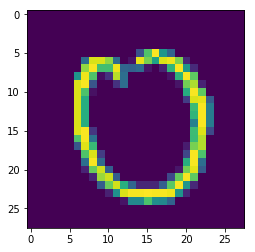

In [13]:
g = plt.imshow(X_train[0][:,:,0])

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [15]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [16]:
model.fit(x = X_train,y = Y_train,batch_size = 100,epochs = 9,validation_data=(X_cv,Y_cv))

Train on 37800 samples, validate on 4200 samples
Epoch 1/9
37800/37800 [==============================] - 31s 828us/step - loss: 0.2975 - accuracy: 0.9081 - val_loss: 0.1052 - val_accuracy: 0.9679
Epoch 2/9
37800/37800 [==============================] - 31s 815us/step - loss: 0.0649 - accuracy: 0.9800 - val_loss: 0.0624 - val_accuracy: 0.9783
Epoch 3/9
37800/37800 [==============================] - 31s 819us/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0816 - val_accuracy: 0.9771
Epoch 4/9
37800/37800 [==============================] - 32s 843us/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0528 - val_accuracy: 0.9843
Epoch 5/9
37800/37800 [==============================] - 31s 820us/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 6/9
37800/37800 [==============================] - 31s 819us/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0532 - val_accuracy: 0.9848
Epoch 7/9
37800/37800 [==============================] - 31s 82

In [17]:
#Prediction ofvtest data
prediction_result = model.predict(X_test)

In [18]:
prediction_results = np.argmax(prediction_result,axis = 1)
prediction_results

array([2, 0, 9, ..., 3, 9, 2])